<a href="https://www.kaggle.com/code/adnanzamanniloy/titanic-survival-prediction?scriptVersionId=288700860" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚢 Titanic Survival Prediction - High-Performance Solution

## Overview
This notebook provides a clean, well-documented approach to predicting Titanic passenger survival using machine learning. The solution focuses on quality feature engineering and model optimization.

**Key Highlights:**
- Comprehensive exploratory data analysis
- Strategic feature engineering
- Optimized ensemble modeling
- Clear documentation for reproducibility

## 📚 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11


## 📊 Load and Inspect Data

In [2]:
# Load datasets
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

print(f"Training set: {train_df.shape[0]} passengers, {train_df.shape[1]} features")
print(f"Test set: {test_df.shape[0]} passengers, {test_df.shape[1]} features\n")

display(train_df.head())
display(train_df.info())

Training set: 891 passengers, 12 features
Test set: 418 passengers, 11 features



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

## 🔍 Missing Values & Survival Overview


Understanding the data patterns is crucial for effective feature engineering.

In [3]:
# Missing values analysis
missing_value =train_df.isnull().sum()
print(missing_value)
# Survival rate overview
survival_rate = train_df['Survived'].mean()
print(f"\n Overall Survival Rate: {survival_rate:.2%}")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Overall Survival Rate: 38.38%


## 📊 Key Survival Factors Analysis


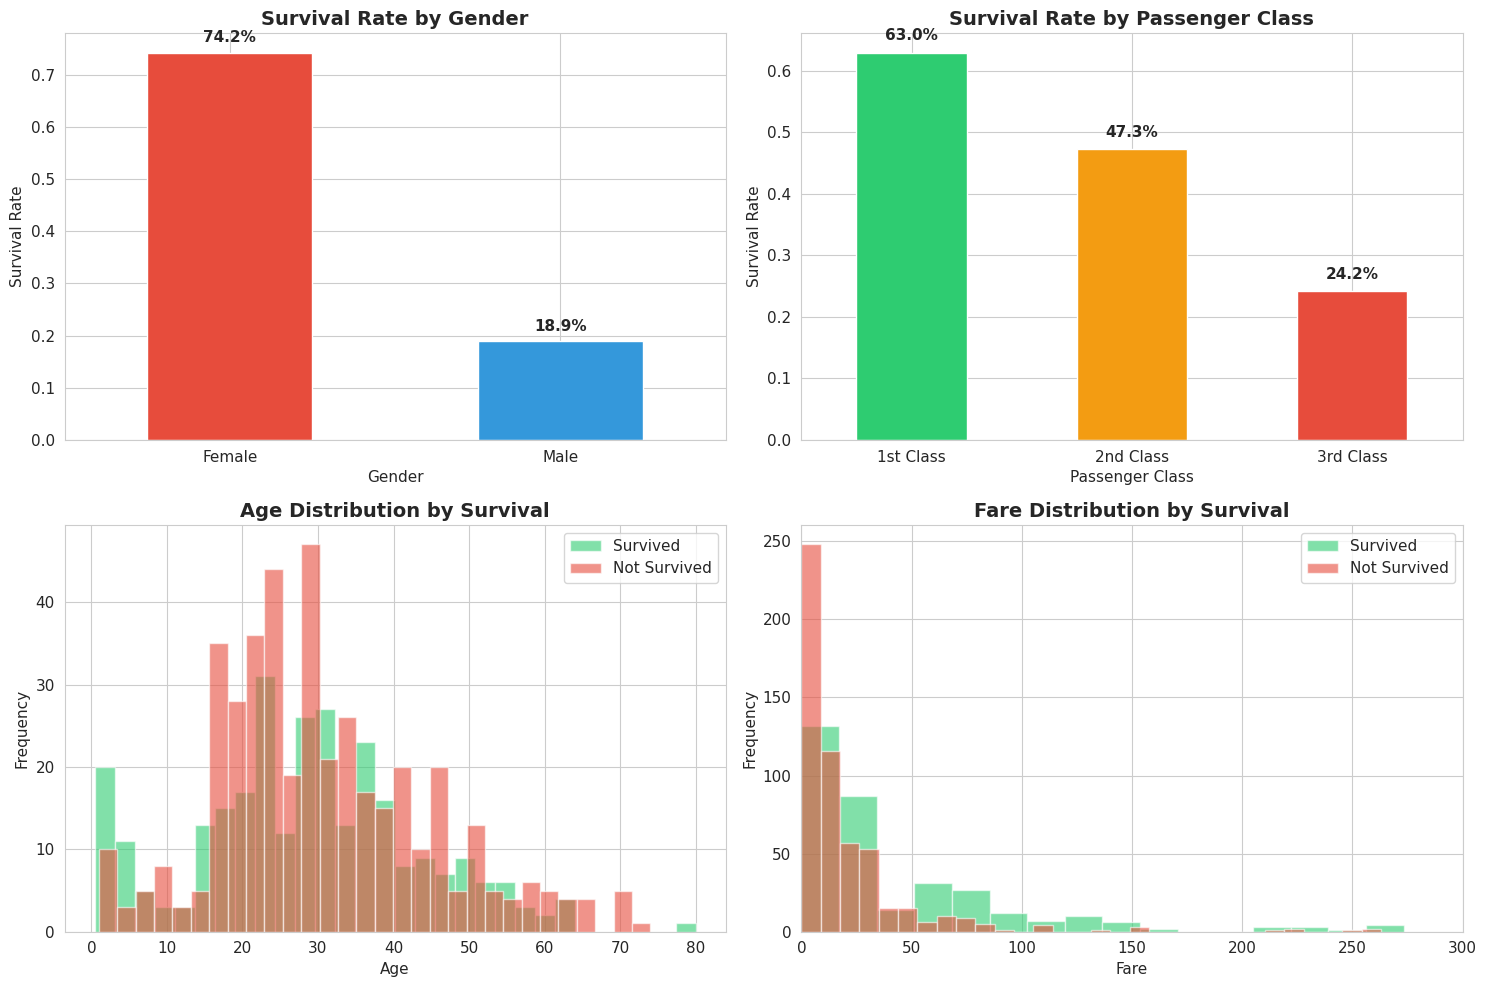

  • Women had 74.2% survival rate vs 18.9% for men
  • 1st class: 63.0% | 2nd class: 47.3% | 3rd class: 24.2%


In [4]:
# Key survival factors visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Survival by Gender
survival_by_sex = train_df.groupby('Sex')['Survived'].agg(['mean', 'count'])
ax1 = axes[0, 0]
survival_by_sex['mean'].plot(kind='bar', ax=ax1, color=['#E74C3C', '#3498DB'])
ax1.set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
ax1.set_ylabel('Survival Rate')
ax1.set_xlabel('Gender')
ax1.set_xticklabels(['Female', 'Male'], rotation=0)
for i, v in enumerate(survival_by_sex['mean']):
    ax1.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

# 2. Survival by Class
survival_by_class = train_df.groupby('Pclass')['Survived'].mean()
ax2 = axes[0, 1]
survival_by_class.plot(kind='bar', ax=ax2, color=['#2ECC71', '#F39C12', '#E74C3C'])
ax2.set_title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Passenger Class')
ax2.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
for i, v in enumerate(survival_by_class):
    ax2.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

# 3. Age Distribution by Survival
ax3 = axes[1, 0]
train_df[train_df['Survived']==1]['Age'].dropna().hist(bins=30, ax=ax3, alpha=0.6, label='Survived', color='#2ECC71')
train_df[train_df['Survived']==0]['Age'].dropna().hist(bins=30, ax=ax3, alpha=0.6, label='Not Survived', color='#E74C3C')
ax3.set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. Fare Distribution by Survival
ax4 = axes[1, 1]
train_df[train_df['Survived']==1]['Fare'].hist(bins=30, ax=ax4, alpha=0.6, label='Survived', color='#2ECC71')
train_df[train_df['Survived']==0]['Fare'].hist(bins=30, ax=ax4, alpha=0.6, label='Not Survived', color='#E74C3C')
ax4.set_title('Fare Distribution by Survival', fontsize=14, fontweight='bold')
ax4.set_xlabel('Fare')
ax4.set_ylabel('Frequency')
ax4.set_xlim(0, 300)
ax4.legend()

plt.tight_layout()
plt.show()


print(f"  • Women had {survival_by_sex.loc['female', 'mean']:.1%} survival rate vs {survival_by_sex.loc['male', 'mean']:.1%} for men")
print(f"  • 1st class: {survival_by_class[1]:.1%} | 2nd class: {survival_by_class[2]:.1%} | 3rd class: {survival_by_class[3]:.1%}")

## 🔧 Feature Engineering


In [5]:


def engineer_features(df):
    df = df.copy()

    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(
        ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],
        'Rare'
    ).replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    df['FarePerPerson'] = df['Fare'] / df['FamilySize']

    df['Deck'] = df['Cabin'].str[0].fillna('Unknown')
    df['HasCabin'] = df['Cabin'].notna().astype(int)

    return df

# Apply feature engineering
train_processed = engineer_features(train_df)
test_processed = engineer_features(test_df)


# EDA-only features

viz_df = train_processed.copy()

viz_df['AgeGroup'] = pd.cut(
    viz_df['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior']
)

viz_df['FareBin'] = pd.qcut(
    viz_df['Fare'],
    q=4,
    labels=['Low', 'Medium', 'High', 'VeryHigh']
)

## 📈 Impact of Engineered Features on Survival


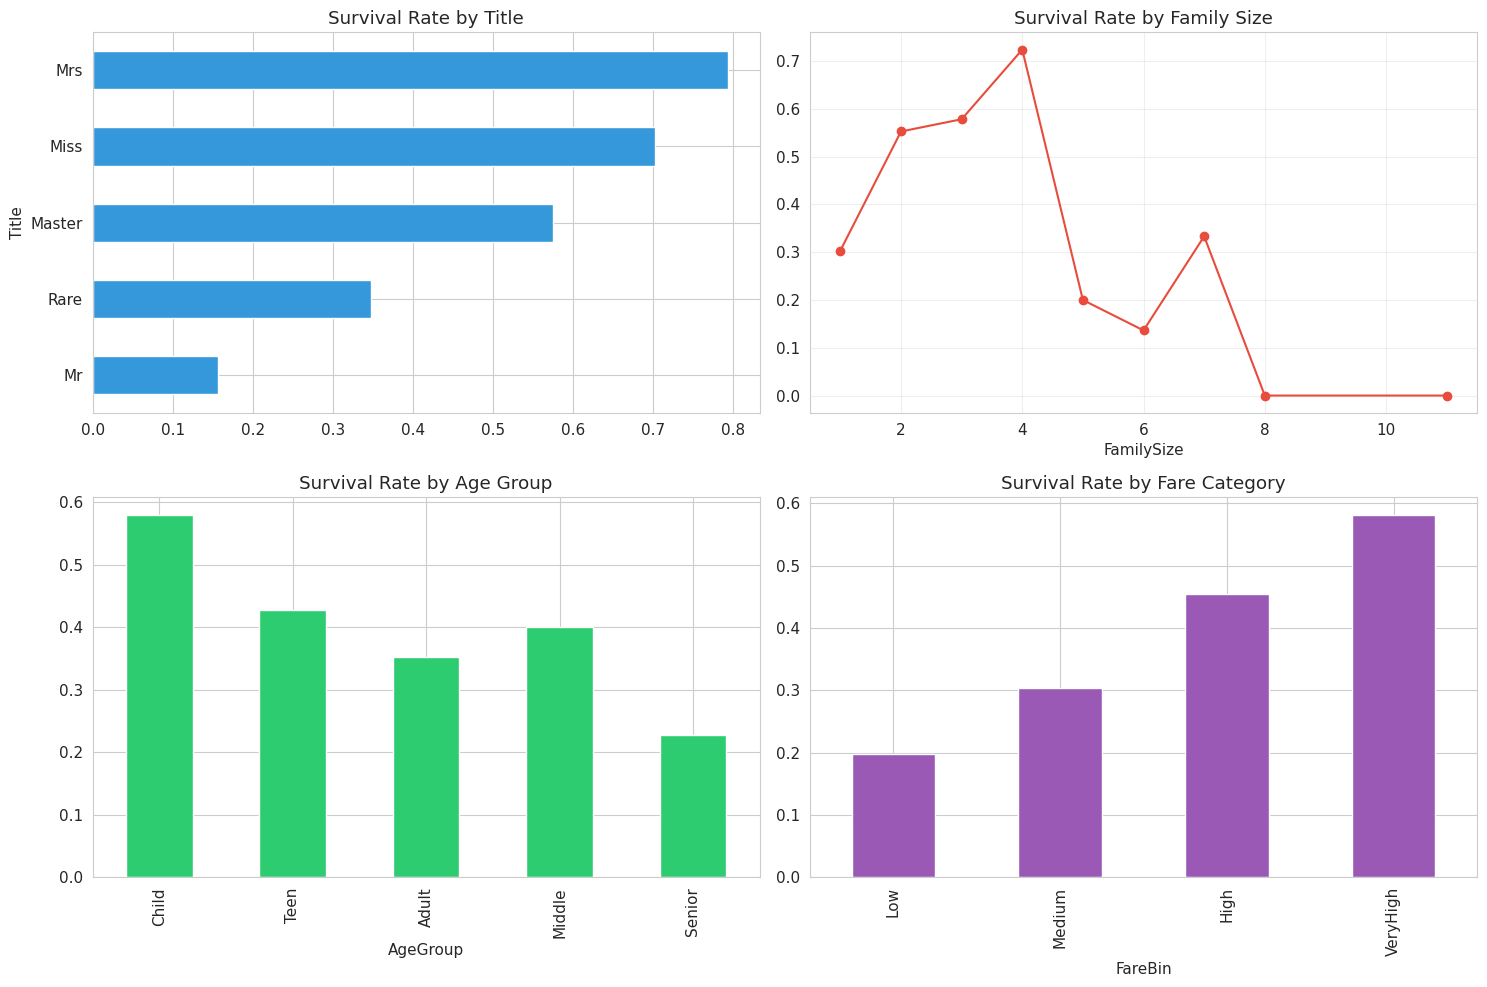

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

viz_df.groupby('Title')['Survived'].mean().sort_values().plot(
    kind='barh', ax=axes[0,0], color='#3498DB'
)
axes[0,0].set_title('Survival Rate by Title')

viz_df.groupby('FamilySize')['Survived'].mean().plot(
    kind='line', marker='o', ax=axes[0,1], color='#E74C3C'
)
axes[0,1].set_title('Survival Rate by Family Size')
axes[0,1].grid(alpha=0.3)

viz_df.groupby('AgeGroup')['Survived'].mean().plot(
    kind='bar', ax=axes[1,0], color='#2ECC71'
)
axes[1,0].set_title('Survival Rate by Age Group')

viz_df.groupby('FareBin')['Survived'].mean().plot(
    kind='bar', ax=axes[1,1], color='#9B59B6'
)
axes[1,1].set_title('Survival Rate by Fare Category')

plt.tight_layout()
plt.show()

## 🤖 Model Training & Optimization

Using an optimized Random Forest with carefully selected features.

In [7]:
feature_columns = [
    'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
    'Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Deck', 'HasCabin'
]

X_train = pd.get_dummies(train_processed[feature_columns], drop_first=False)
X_test  = pd.get_dummies(test_processed[feature_columns], drop_first=False)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

y_train = train_processed['Survived']


## 🌲 Random Forest Model Training & Validation


In [8]:

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_split=6,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("CV Accuracy:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Training accuracy
print(f"Training Accuracy: {rf.score(X_train, y_train):.4f}")


CV Accuracy: [0.83798883 0.80898876 0.84269663 0.80898876 0.85393258]
Mean CV Accuracy: 0.8305 ± 0.0183
Training Accuracy: 0.8698


## 🧩 Feature Importance Analysis


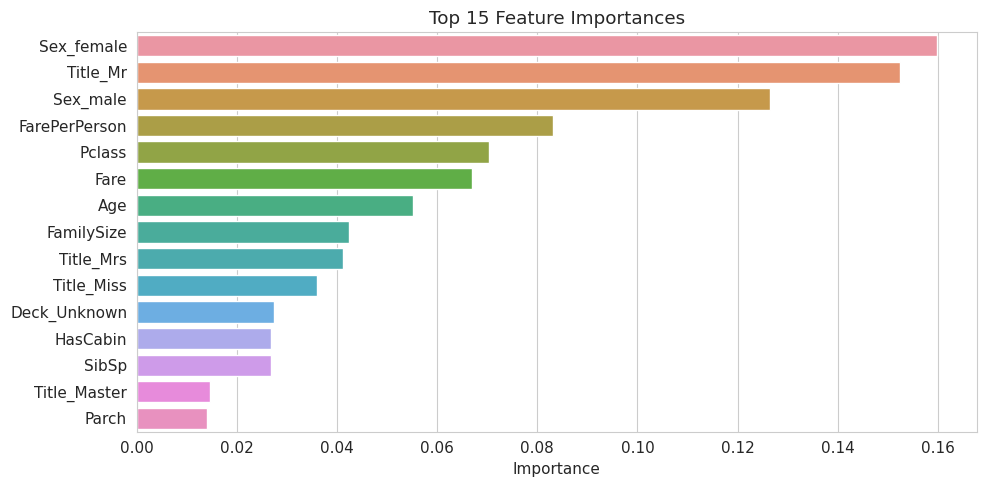

In [9]:
# Feature importance
imp = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=imp.values, y=imp.index)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Generate the submission file

In [10]:
# Predict on test set
test_predictions = rf.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('submission.csv', index=False)

print("submission.csv created")


submission.csv created
